### LinearRegression

In [2]:
# importing Dataset

from sklearn.linear_model import LinearRegression,SGDRegressor
import numpy as np
import pandas as pd
from statsmodels.api import OLS
from scipy.stats import shapiro,anderson,kstest,pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from  statsmodels.stats.outliers_influence import  variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler,power_transform
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels as sm

In [4]:
#  importing dataset
df=pd.read_csv(r"C:\Users\91959\Project Folder\House_Price_Prediction\HousingData.csv")

In [5]:
df.info()

# All the columns are intergers and floats. Hence they are continuous.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [21]:
x = df.iloc[:,:-1]

In [24]:
y = df.iloc[:,-1]

# Linearity test

In [97]:
def test_linearity(dff):
    new_df=pd.DataFrame(columns=["Feature","Target","pearson_r_value","pvalue","significance"])
    for i in dff.iloc[:,:]:
        for j in dff.iloc[:,:]:
            p=pearsonr(dff[i],dff[j])
            
            if p[1]>0.05:
                new_df=new_df.append({"Feature":i,"Target":j,"pearson_r_value":p[0],"pvalue":p[1],"significance":"Not significant"},ignore_index=True)
            elif p[1]<0.05:
                 new_df=new_df.append({"Feature":i,"Target":j,"pearson_r_value":p[0],"pvalue":p[1],"significance":"significant"},ignore_index=True)


    return new_df

In [102]:
# Linearity check

lin=test_linearity(df)
lin.loc[lin["Target"]=="medv"]


#  All Independent features are in Linear Relationship with Dependent features 

,Feature,Target,pearson_r_value,pvalue,significance
13,crim,medv,-0.482030,1.737141e-28,significant
27,zn,medv,0.436177,4.595313e-23,significant
41,indus,medv,-0.612220,2.846305e-49,significant
55,chas,medv,0.097053,3.622310e-02,significant
69,nox,medv,-0.569014,2.467148e-41,significant
83,rm,medv,0.568940,2.540259e-41,significant
97,age,medv,-0.557098,2.404750e-39,significant
111,dis,medv,0.439844,1.812338e-23,significant
125,rad,medv,-0.504338,1.950940e-31,significant
139,tax,medv,-0.590236,4.391606e-45,significant


# Normality test

In [104]:
def test_normality(dff):
    
    sh_df=pd.DataFrame(columns=["feature","pvalue","normality"])
    for i in dff.columns:
        sh=shapiro(dff[i])
        if sh[1]>0.05:
            sh_df=sh_df.append({"feature":i,"pvalue":sh[1],"normality":"Normally Distributed"},ignore_index=True)
        else:
            sh_df=sh_df.append({"feature":i,"pvalue":sh[1],"normality":"Not Normally Distributed"},ignore_index=True)
    return sh_df

In [106]:
#  Test Normality of target variable

test_normality(df[["medv"]])

,feature,pvalue,normality
0,medv,0.000197,Not Normally Distributed


<AxesSubplot:xlabel='medv', ylabel='Density'>

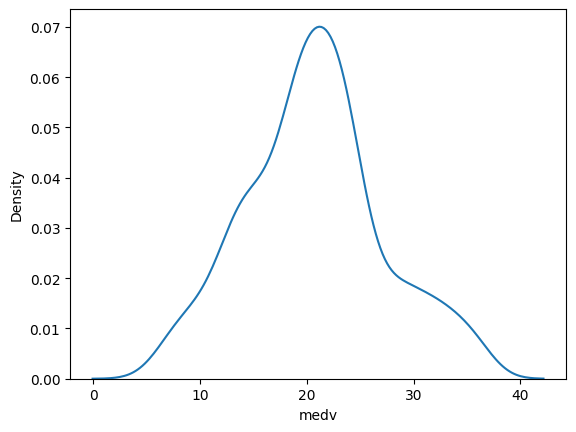

In [108]:
sns.kdeplot("medv",data=df)

#  Test for Multi collinearity

In [129]:
#  Test for Multi collinearity

yy=df.iloc[:,:-1]
mult=pd.DataFrame(columns=["feature","vif"])



# for i in range(len(yy.columns)):
#     print(list(yy.columns)[i],variance_inflation_factor(yy,i))



for i in range(len(yy.columns)):
    # print(list(yy.columns)[i],variance_inflation_factor(yy,i))
    mult=mult.append({"feature":list(yy.columns)[i],"vif":variance_inflation_factor(yy,i)},ignore_index=True)

print(mult)

    feature        vif
0      crim   2.185331
1        zn   2.894044
2     indus  14.838689
3      chas   1.139251
4       nox  73.230169
5        rm  99.059706
6       age  21.581539
7       dis  15.601800
8       rad  15.029579
9       tax  60.625440
10  ptratio  95.007589
11    black  18.904966
12    lstat  12.207987


In [351]:
x=df.iloc[:,:-1]
y=df.iloc[:,[-1]]



In [26]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [343]:
# x=sm.api.add_constant(x)

In [352]:
#  Split train and test

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=23)


In [353]:
#  Feature scaling
# Lets us check normality of all columns at significance level of 5%
test_normality(df)


# No column in dataset is normaaly distributed

,feature,pvalue,normality
0,crim,5.363994e-35,Not Normally Distributed
1,zn,6.679295e-33,Not Normally Distributed
2,indus,2.385651e-16,Not Normally Distributed
3,chas,1.757129e-39,Not Normally Distributed
4,nox,1.645634e-13,Not Normally Distributed
5,rm,2.342833e-08,Not Normally Distributed
6,age,1.667852e-17,Not Normally Distributed
7,dis,9.764172e-17,Not Normally Distributed
8,rad,9.772150e-29,Not Normally Distributed
9,tax,9.368363e-23,Not Normally Distributed


In [355]:
# Lets us scale down the features as their magnitudes are high and they are in different scales
scalee=MinMaxScaler()
scalee.fit(xtrain)
x_train=scalee.transform(xtrain)
x_test=scalee.transform(xtest)
y_train=scalee.fit_transform(ytrain)
y_test=scalee.transform(ytest)

In [357]:
x_train=pd.DataFrame(x_train,columns=xtrain.columns)
y_train=pd.DataFrame(y_train,columns=ytrain.columns)
x_test=pd.DataFrame(x_test,columns=xtest.columns)
y_test=pd.DataFrame(y_test,columns=ytest.columns)

# now we have scaled down data


In [373]:
x_train=sm.api.add_constant(x_train)
x_test=sm.api.add_constant(x_test)

In [360]:
x_train

,const,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1.0,0.001813,0.00,0.245926,0.0,0.215768,0.693705,0.508754,0.309696,0.173913,0.190840,0.733333,1.000000,0.145040
1,1.0,0.000870,0.45,0.100000,0.0,0.099585,0.877482,0.370752,0.312089,0.173913,0.402672,0.244444,1.000000,0.094749
2,1.0,0.006838,0.00,0.202222,0.0,0.244813,0.740194,0.802266,0.194285,0.304348,0.229008,0.488889,1.000000,0.156154
3,1.0,0.058396,0.00,0.642963,1.0,0.790456,0.621308,0.829042,0.144292,1.000000,0.914122,0.800000,0.996273,0.263962
4,1.0,0.000863,0.00,0.063704,0.0,0.205394,0.494673,0.894954,0.168424,0.086957,0.011450,0.533333,0.985040,0.333426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,1.0,0.114945,0.00,0.642963,0.0,0.466805,0.635351,0.966014,0.094044,1.000000,0.914122,0.800000,0.956387,0.445957
322,1.0,0.002945,0.00,0.331481,0.0,0.406639,0.540678,0.697219,0.159762,0.217391,0.389313,0.688889,1.000000,0.336760
323,1.0,0.000307,0.75,0.081852,0.0,0.080913,0.838499,0.132853,0.388016,0.086957,0.124046,0.588889,0.996754,0.000000
324,1.0,0.000853,0.22,0.189630,0.0,0.087137,0.822276,0.040165,0.707011,0.260870,0.272901,0.677778,0.972590,0.043068


In [361]:

# OLS

ols_model=OLS(y_train,x_train).fit()
ols_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     80.26
Date:                Wed, 27 Jul 2022   Prob (F-statistic):           3.31e-91
Time:                        23:40:22   Log-Likelihood:                 283.51
No. Observations:                 326   AIC:                            -539.0
Df Residuals:                     312   BIC:                            -486.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6291      0.068      9.246      0.000       0.495       0.763
crim          -0.2824      0.079     -3.558      0.000      -0.439      -0.126
zn             0.1513      0.040      3.790      0.000       0.073       0.230
indus         -0.0321      0.045     -0.719      0.472      -0.120       0.056
chas           0.0410      0.024      1.705      0.089      -0.006       0.088
nox           -0.1934      0.051     -3.810      0.000      -0.293      -0.093
rm             0.3340      0.056      5.936      0.000       0.223       0.445
age           -0.0574      0.035     -1.619      0.107      -0.127       0.012
dis           -0.3667      0.061     -6.025      0.000      -0.486      -0.247
rad            0.1898      0.040      4.734      0.000       0.111       0.269
tax           -0.2166      0.052     -4.193      0.000      -0.318      -0.115
ptratio       -0.1730      0.032     -5.353      0.000      -0.237      -0.109
black          0.1190      0.029      4.097      0.000       0.062       0.176
lstat         -0.3976      0.052     -7.642      0.000      -0.500      -0.295
==============================================================================
Omnibus:                       48.975   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.230
Skew:                           0.847   Prob(JB):                     1.14e-19
Kurtosis:                       4.884   Cond. No.                         31.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##  Insights on OLS

Derbin watson value is very close to 2. Hence the errors are not auto correlated.
Pvalue of F statistic is lesser than zero hence the model is significant.
We could see pvalue of tstatistic for columns age,indus are greater than 0.05. Hence they are insignificant features .


In [363]:
errors=ols_model.resid
errors


0     -0.005173
1      0.131451
2      0.108977
3      0.099121
4      0.127418
         ...   
321   -0.106818
322   -0.032979
323    0.087390
324    0.152536
325   -0.056512
Length: 326, dtype: float64

<AxesSubplot:>

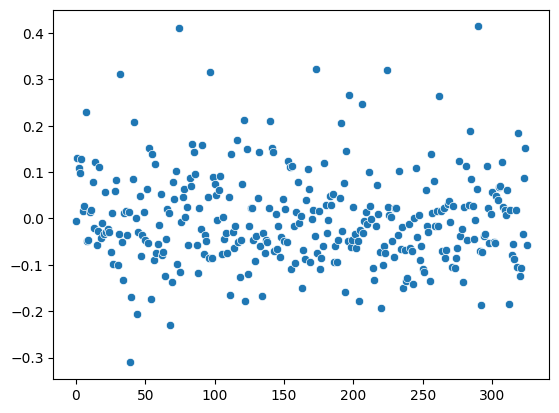

In [364]:
# scatter plot of errors


sns.scatterplot(data=errors)

###  Errors seems to be Homoscadastic from the above scatter plot

In [365]:
# Test for Mormality of Errors

stat,pval=shapiro(errors)
if pval>0.05:
    print("Pvalue is %.6f and shipro statistic value is %.6f. It is Normally distributed" %(pval,stat))
else:
    print("Pvalue is %.6f and shipro statistic value is %.6f. It is not Normally distributed" %(pval,stat))

Pvalue is 0.000000 and shipro statistic value is 0.958371. It is not Normally distributed


###  Errors are not normally distributed. 

<AxesSubplot:ylabel='Density'>

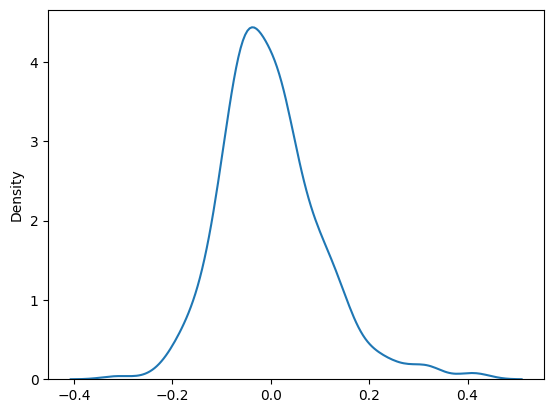

In [366]:
sns.kdeplot(errors)

In [368]:
# Let us transform target variable using transformation methods so that errors follows normal distribution

# y_train_l=

print(shapiro(np.log10(y_train)))


d=np.log10(y_train)
d.loc[d["medv"]==-np.inf,:]
y_train.loc[68,:]


# since our target variabl  has 0 , its log value would be undefined. Hence we cannot use Log normal transformation




ShapiroResult(statistic=nan, pvalue=1.0)


medv    0.0
Name: 68, dtype: float64

In [369]:
# we can use yeo johnson transformation

# y_train_y=

y_train_y=pd.DataFrame(power_transform(y_train,method='yeo-johnson'),columns=y_train.columns)




# 2nd time OLS model

In [370]:
# let us build OLS model again with transformed dependent variable

ols_1_model=OLS(y_train_y,x_train).fit()
ols_1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     82.96
Date:                Wed, 27 Jul 2022   Prob (F-statistic):           6.41e-93
Time:                        23:42:37   Log-Likelihood:                -218.99
No. Observations:                 326   AIC:                             466.0
Df Residuals:                     312   BIC:                             519.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7151      0.318      2.250      0.025       0.090       1.341
crim          -1.4472      0.371     -3.903      0.000      -2.177      -0.718
zn             0.6538      0.186      3.506      0.001       0.287       1.021
indus         -0.1062      0.208     -0.510      0.610      -0.516       0.303
chas           0.1945      0.112      1.733      0.084      -0.026       0.415
nox           -0.9402      0.237     -3.966      0.000      -1.407      -0.474
rm             1.4637      0.263      5.568      0.000       0.946       1.981
age           -0.2416      0.166     -1.459      0.145      -0.567       0.084
dis           -1.6545      0.284     -5.820      0.000      -2.214      -1.095
rad            0.9019      0.187      4.816      0.000       0.533       1.270
tax           -1.0322      0.241     -4.278      0.000      -1.507      -0.557
ptratio       -0.8088      0.151     -5.357      0.000      -1.106      -0.512
black          0.5714      0.136      4.210      0.000       0.304       0.838
lstat         -1.9690      0.243     -8.102      0.000      -2.447      -1.491
==============================================================================
Omnibus:                       45.679   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.025
Skew:                           0.774   Prob(JB):                     2.09e-19
Kurtosis:                       4.984   Cond. No.                         31.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [371]:
error_ols1=ols_1_model.resid

# check normality of errors

stat,pval=shapiro(error_ols1)

if pval>0.05:
    print("Pvalue is %.6f and shipro statistic value is %.6f. It is Normally distributed" %(pval,stat))
else:
    print("Pvalue is %.6f and shipro statistic value is %.6f. It is not Normally distributed" %(pval,stat))

Pvalue is 0.000000 and shipro statistic value is 0.961697. It is not Normally distributed


<AxesSubplot:ylabel='Density'>

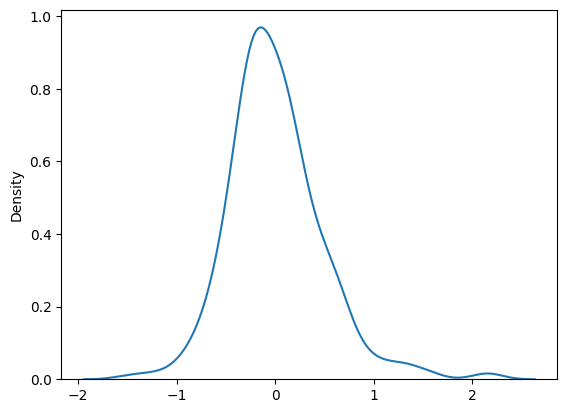

In [309]:
sns.kdeplot(error_ols1)

####  Still the errors are not normally distributed

In [374]:
# lets  use ytest to make predictions

ols_ypreds=ols_1_model.predict(x_test)

In [375]:
rmse=np.sqrt(mean_squared_error(y_test,ols_ypreds))
print("RMSE of OLS model prediction: %.6f" %rmse)

RMSE of OLS model prediction: 0.811107


# Linear Regression model

### Linear model should not have const column but OLS model should have const column

In [377]:
x_train_l=x_train.drop(columns=["const"])
x_test_l=x_test.drop(columns=["const"])

### Linear Regression model

In [379]:
lin_model=LinearRegression()
lin_model.fit(x_train_l,y_train_y)

LinearRegression()

In [380]:
print("Coefficients of  features",lin_model.coef_)
print("Intercept:", lin_model.intercept_)

Coefficients of  features [[-1.44723723  0.65381911 -0.10618753  0.1945049  -0.94023503  1.46367656
  -0.24156905 -1.65446153  0.90193539 -1.03219653 -0.80880094  0.57136025
  -1.96903078]]
Intercept: [0.71514944]


In [382]:
lin_ogpreds=lin_model.predict(x_train_l)
print("Root mean squared error for same train data: ",np.sqrt(mean_squared_error(y_train_y,lin_ogpreds)))

Root mean squared error:  0.4737014107767795


In [385]:
ypredstest=lin_model.predict(x_test_l)
print("Root mean squard for test predictions",np.sqrt(mean_squared_error(ytest,ypredstest)))

Root mean squard for test predictions 21.45978775224371


#  Stockastic gradient descent

In [396]:
#  stockastic gradient descent

gd_model=SGDRegressor(max_iter=300).fit(x_train_l,y_train_y)

In [397]:
print("Coefficients",gd_model.coef_)
print("Intercept",gd_model.intercept_)

Coefficients [-0.1945301   0.31912116 -0.36893502  0.28069906 -0.30721476  0.75607699
 -0.35327839  0.08734194 -0.12658703 -0.39548735 -0.39232441  0.52248782
 -0.8312455 ]
Intercept [0.20696337]


In [400]:
print("RMSE for train predicts",np.sqrt(mean_squared_error( y_train_y,gd_model.predict(x_train_l))))

RMSE for train predicts 0.5842728403263834


In [402]:
ypreds_sgd= gd_model.predict(x_test_l)

print("RMSE for test data :", np.sqrt(mean_squared_error(y_test,ypreds_sgd)))

RMSE for test data : 0.765440879948261
